## Set up your environment

Before we can run any code, we need to set up our development environment. This means installing libraries -- or other people's code -- that our own code will call.

`pip` is a package management tool the Python coding language.

`torch` is one of the primary Machine Learning libraries that AI models are built from.

`transformers` is the HuggingFace library that provides code that makes it easy to use different models in your own code.

`pillow` is an imaging library used to open, display, create, and manipulate images in Python.

In [1]:
%pip install -U "torch==2.7.0" torchvision transformers pillow ipywidgets

Note: you may need to restart the kernel to use updated packages.


## Import Statements

Our code will run code from other libraries. These libraries need to be imported before they can be used. It is best practice to place `import` statements before any of your own code.

In [2]:
import torch
import PIL.Image
from IPython.display import display, Image
from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers.image_utils import load_image


## Choose a Model

AI advancements are being made every day, and AI models are constantly being created/updated. When choosing a model, there are a few key factors to consider:

1. The most important factor in choosing a model is picking one that can **solve your problem given your type of inputs**. If you want to classify images, you'll need a vision model; a chatbot needs a model with Text-to-Text capabilities; some models are "multimodal", meaning they can output predictions from multiple types of input (text, video, audio, images, etc.).
2. The next most important factor is picking a model that's the **right "size" for your environment**. The size of the model is usually measured in the number of **parameters** it uses, with the largest AI models measuring hundreds of billions and the smallest ones being hundreds of thousands. More parameters require more RAM. In my experience, a newer laptop with 48GB of RAM can run a model with 20B parameters slowly; mobile devices can run models up to 7B parameters.
3. Finally, test different models against your data. The models you get from HuggingFace are **pretrained**. The output generated by a model depends a lot on the data it saw during the pretraining step. Since different model providers use different data sets during pretraining, you won't know what kind of response you'll get from a model until you try it!

In [3]:
# Choose an Image-Text-to-Text Multimodal Model
MODEL_ID = "HuggingFaceTB/SmolVLM-Instruct"  # @param ["HuggingFaceTB/SmolVLM-Instruct", "moonshotai/Kimi-VL-A3B-Instruct", "Qwen/Qwen2.5-VL-7B-Instruct"] {"allow-input": true, "isTemplate": true}
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print(DEVICE)

cpu


## Initialize the model and the inference pipeline

Data in a computer is represented in binary -- or 1's and 0's. This includes images, text, audio, video, and everything inbetween. For example, when a photo is saved on your phone, the light information captured by the camera sensor is converted into binary and a program interprets that binary to display a picture on the screen.

Similarly, Machine Learning models need data in the form of **tensors**. These are large matrices -- or lists of lists of lists of... -- of numbers, usually between 0 and 1. When you chat with AI, your words are converted to tensors, the AI responds in tensors, and a program interprets the result as natural language. This process is called the **inference pipeline**. The inference part comes from the fact that the AI model is attempting to infer the next word in the conversation, based on what's already been said.

Because this process is so common in AI development, there are libraries that reduce all of these steps (and more!) into a few lines of code.

In [4]:
processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-Instruct")
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceTB/SmolVLM-Instruct",
    torch_dtype=torch.bfloat16,
    _attn_implementation="flash_attention_2" if DEVICE == "cuda" else "eager",
).to(DEVICE)

## Construct a Prompt

Prompts are natural language instructions given to an AI agent that determine what type of task it should perform and how it should respond. The phrasing of a prompt can have dramatic impact on the output generated. Prompts need to balance between being thorough and concise

In [27]:
picture_prompt = """
    You are an AI writing assistant tasked with creating menu descriptions for a 
    family sushi restaurant. The user will provide an image of a dish and list ingredients.
    Given the image, provide appetizing descriptions of the food with the given ingredients.
    Keep the tone friendly and responses concise.
"""

## Initialize the Input

Create variables that contain the input that will be provided to the AI Agent.

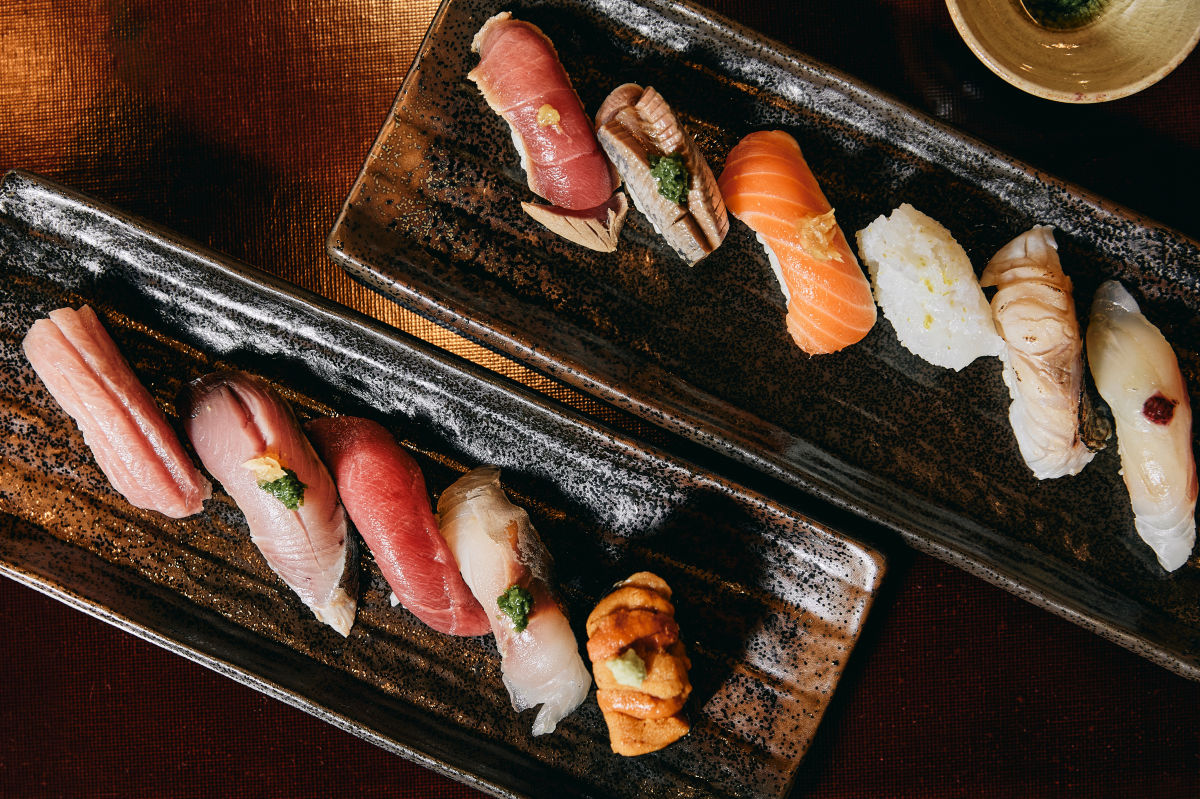

In [28]:
img = PIL.Image.open('sushi_plate.jpeg')
input_text = """
    This image contains two sushi lunch plates including tuna, salmon, squid, and yellow tail.
    The fish is garnished with fresh, ground wasabi, home made yuzu sauce, and an assortment
    of Japanese ferns. Rewrite the description to make it more fun and emphasize the freshness
    of the fish.
"""

display(Image('sushi_plate.jpeg', width=300))

In [29]:
messages = [
    {
        "role": "system",
        "content": [
            {"type": "text", "text": picture_prompt}
        ]
    },
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": input_text}
        ]
    }
]

## Process the input

This stage prepares the input for the model to perform predictions on. There can be many steps to this process including batching, tokenization, and masking. Once the inputs have been processed, the print statement shows how they have been converted into tensors for the Machine Learning Model.

In [30]:
prompt = processor.apply_chat_template(messages, add_generation_prompt=False)
inputs = processor(text=prompt, images=[img], return_tensors="pt")
inputs = inputs.to(DEVICE)

print(inputs)

{'pixel_values': tensor([[[[[ 0.5373,  0.1059, -0.0745,  ..., -0.8039, -0.6078, -0.0902],
           [ 0.2941,  0.0039, -0.1059,  ..., -0.6863, -0.5373, -0.0510],
           [-0.0353, -0.1608, -0.2157,  ..., -0.6157, -0.5059, -0.0431],
           ...,
           [-0.9922, -0.9922, -0.9373,  ..., -0.4118, -0.8275, -0.8275],
           [-0.9451, -0.9765, -0.9843,  ..., -0.5059, -0.8824, -0.8667],
           [-0.9216, -0.9686, -1.0000,  ..., -0.5294, -0.8667, -0.8902]],

          [[-0.2314, -0.5843, -0.6941,  ..., -0.8980, -0.8824, -0.6471],
           [-0.4196, -0.6314, -0.6549,  ..., -0.8118, -0.8196, -0.6078],
           [-0.6706, -0.7020, -0.6706,  ..., -0.7882, -0.8275, -0.6157],
           ...,
           [-0.9216, -0.9373, -0.8980,  ..., -0.8275, -0.9529, -0.8588],
           [-0.8824, -0.9373, -0.9843,  ..., -0.9216, -0.9922, -0.8902],
           [-0.8824, -0.9294, -0.9843,  ..., -0.9373, -0.9686, -0.8980]],

          [[-0.7176, -0.9451, -0.9373,  ..., -0.9843, -0.9451, -0.7725]

In [ ]:
# Perform inference and generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=5000)

print(generated_ids)

In [26]:
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

print(generated_texts[0])

System: 
    You are an AI writing assistant tasked with creating menu descriptions for a 
    family sushi restaurant. The user will provide an image of a dish and list ingredients.
    Given the image, provide appetizing descriptions of the food with the given ingredients.
    Keep the tone friendly and responses concise. They should not exceed 100 words, and be 
    at most 2 sentences.

User:<image>    This image contains two sushi lunch plates including tuna, salmon, squid, and yellow tail.
    The fish is garnished with fresh, ground wasabi, home made yuzu sauce, and an assortment
    of Japanese ferns.

The plates are placed on a dark wood table.
